In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy,scipy,matplotlib

Sebastian Raschka 

CPython 3.6.1
IPython 6.0.0

numpy 1.13.0
scipy 0.19.0
matplotlib 2.0.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Probability Density Functions (PDFs)

- for working with continuous variables (vs. probability mass functions for discrete variables)
- here, the area under the curve give the probability (in contrast to probability mass functions where we have probabilities for every single value)
- the area under the whole curve is 1

## Normal Distribution (Gaussian Distribution)

### Probability Density Function of the Normal Distribution

- unimodal and symmetric
- many algorithms in machine learning & statistics have normality assumptions
- two parameters: mean (center of the peak) and standard deviation (spread); $N(\mu, \sigma)$
- we can estimate parameters of $N(\mu, \sigma^2)$ by sample mean ($\bar{x})$ and sample variance ($s^2$)
- univariate Normal distribution:

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \; \exp\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)$$


- standard normal distribution with zero mean and unit variance, $N(0, 1)$:

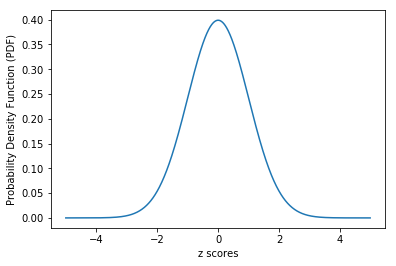

In [3]:
def univariate_gaussian_pdf(x, mean, variance):
    return (1. / np.sqrt(2*np.pi*variance) * 
            np.exp(- ((x - mean)**2 / 2.*variance)))

mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)
y = univariate_gaussian_pdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Probability Density Function (PDF)')
plt.show()

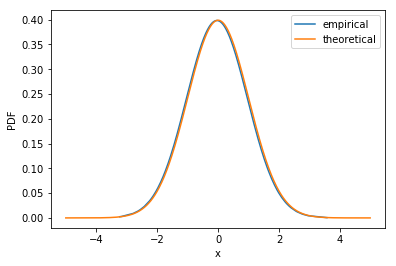

In [4]:
sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

def empirical_pdf(sample):
    sample_mean = np.mean(sample)
    sample_variance = np.var(sample, ddof=1)
    sample_sorted = np.sort(sample)
    sample_pdf = univariate_gaussian_pdf(sample_sorted, 
                                     sample_mean, 
                                     sample_variance)
    return sample_sorted, sample_pdf

sample_sorted, sample_pdf = empirical_pdf(sample)
plt.plot(sample_sorted, sample_pdf, label='empirical')
plt.plot(x, y, label='theoretical')
plt.ylabel('PDF')
plt.xlabel('x')
plt.legend()
plt.show()

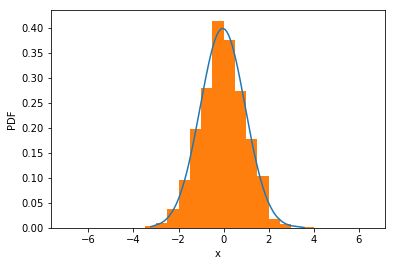

In [5]:
plt.plot(sample_sorted, sample_pdf)
plt.hist(sample_sorted, normed=True, 
         bins=np.arange(-7, 7, 0.5))
plt.ylabel('PDF')
plt.xlabel('x')
plt.show()

### Cumulative Distribution Function (CDF)

- CDF of the normal distribution:

$$F(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \int_{-\infty}^{x} \exp \Big(-\frac{(t-\mu)^2}{2\sigma^2}\Big) dt$$


In [6]:
from scipy.integrate import quad


def gaussian_cdf_helper(t, mean, variance):
    return (1. / (np.sqrt(2.*np.pi*variance)) * 
                 np.exp(-(t - mean)**2 / (2.*variance)))


def gaussian_cdf(x, mean, variance):

    sd = 1
    mean =0
    out = []
    for val in x:
        integ = (quad(gaussian_cdf_helper, 
                      -np.inf, 
                      val, 
                      args=(mean, variance))[0])
        out.append(integ)
    return out

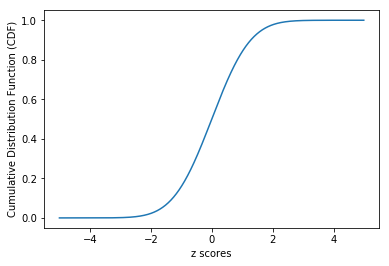

In [7]:
mean = 0
stddev = 1
x = np.arange(-5, 5, 0.01)

y = gaussian_cdf(x, mean, stddev**2)
plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

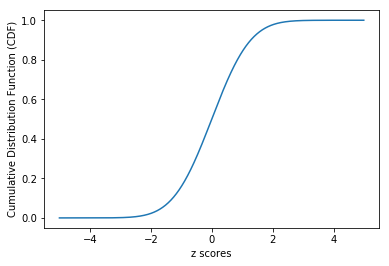

In [8]:
y = stats.norm.cdf(x)

plt.plot(x, y)
plt.xlabel('z scores')
plt.ylabel('Cumulative Distribution Function (CDF)')
plt.show()

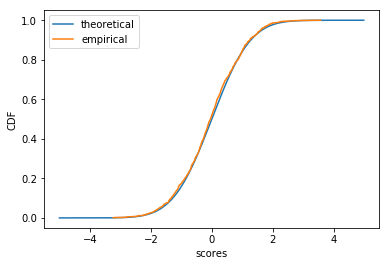

In [9]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y


sample_size = 1000

rng = np.random.RandomState(123)
sample = rng.normal(loc=0.0, scale=1.0, size=sample_size)

sample_sorted, sample_cdf = empirical_cdf(sample)
plt.plot(x, y, label='theoretical')
plt.plot(sample_sorted, sample_cdf, label='empirical')
plt.ylabel('CDF')
plt.xlabel('scores')
plt.legend()
plt.show()

## Exponential Distribution

### Probability Density Function of the Exponential Distribution

- has only 1 parameter, the rate parameter $\lambda$ (the "mean waiting time," $\lambda > 0$)
- describes the time between events in a Poisson process (for Poisson distribution, see the notebook on [Probability Mass Functions](./pmf_1.ipynb))
- note that the Poisson distribution can be derived from both the binomial and the exponential distribution
- the exponential pdf is used to model waiting times between any two events from a poisson process; the exponential distribution is continuous
- the poisson pdf models the probability of *k* hits in a given time interval; the poisson distribution is discrete

$$f(x; \lambda) = \begin{cases} 
      e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

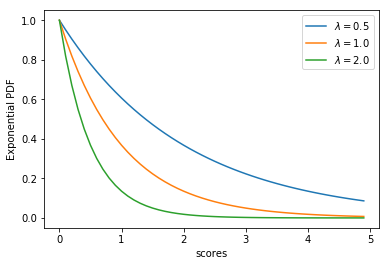

In [10]:
def univariate_exponential_pdf(x, lambda_):
    return np.where(x >= 0, np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_pdf(x, lambda_=.5)
y_1 = univariate_exponential_pdf(x, lambda_=1.)
y_2 = univariate_exponential_pdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential PDF')
plt.legend(loc = 'upper right')
plt.show()

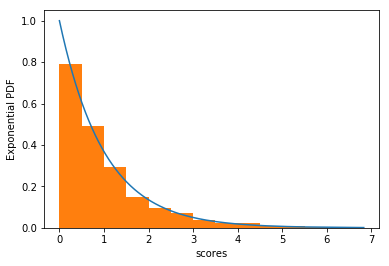

In [11]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.pdf(x_sample)

plt.plot(x_sample, y_sample)
plt.hist(x_sample, normed=True, bins=np.arange(0, 7, 0.5))
plt.xlabel('scores')
plt.ylabel('Exponential PDF')

### Cumulative Distributiion Function of the Exponential Distribution

$$F(x; \lambda) = \begin{cases} 
      1 - e^{-\lambda x} & x\geq 0, \\
      0 & x < 0.
   \end{cases}
$$

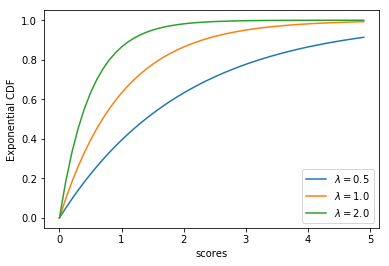

In [12]:
def univariate_exponential_cdf(x, lambda_):
    return np.where(x >= 0, 1 - np.exp(-lambda_*x) , 0)

x = np.arange(0, 5, .1)
y_05 = univariate_exponential_cdf(x, lambda_=.5)
y_1 = univariate_exponential_cdf(x, lambda_=1.)
y_2 = univariate_exponential_cdf(x, lambda_=2.)

plt.plot(x, y_05, label='$\lambda=0.5$')
plt.plot(x, y_1, label='$\lambda=1.0$')
plt.plot(x, y_2, label='$\lambda=2.0$')
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.legend(loc = 'lower right')
plt.show()

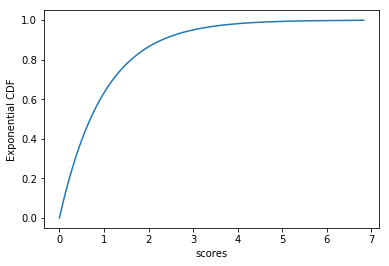

In [13]:
rng = np.random.RandomState(123)
x_sample = rng.exponential(scale=1.0, size=1000)
x_sample = np.sort(x_sample)
y_sample = stats.expon.cdf(x_sample)

plt.plot(x_sample, y_sample)
plt.xlabel('scores')
plt.ylabel('Exponential CDF')
plt.show()